In [7]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [5]:
df_drive = pd.read_csv('monaco_2023_car_data_driver_1.csv')
df_lap = pd.read_csv('monaco_2023_laps.csv')
df_stints = pd.read_csv('monaco_2023_stints.csv')

df_drive['date'] = df_drive['date'].astype(str)
df_lap['date_start'] = df_lap['date_start'].astype(str)

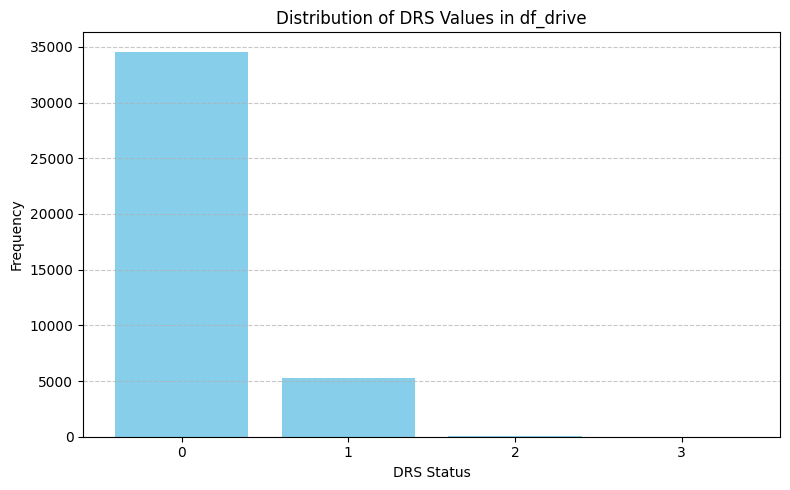

In [9]:
drs_counts = df_drive['drs'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(drs_counts.index.astype(str), drs_counts.values, color='skyblue')

# Add labels and title
plt.xlabel("DRS Status")
plt.ylabel("Frequency")
plt.title("Distribution of DRS Values in df_drive")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [4]:
df_drive.columns

Index(['date', 'session_key', 'brake', 'n_gear', 'meeting_key',
       'driver_number', 'drs', 'throttle', 'speed', 'rpm'],
      dtype='object')

In [5]:
df_drive.join(df_lap, on=[''])

KeyError: ''

In [6]:
df_lap.columns

Index(['meeting_key', 'session_key', 'driver_number', 'lap_number',
       'date_start', 'duration_sector_1', 'duration_sector_2',
       'duration_sector_3', 'i1_speed', 'i2_speed', 'is_pit_out_lap',
       'lap_duration', 'segments_sector_1', 'segments_sector_2',
       'segments_sector_3', 'st_speed'],
      dtype='object')

In [7]:
df_lap


,meeting_key,session_key,driver_number,lap_number,date_start,duration_sector_1,duration_sector_2,duration_sector_3,i1_speed,i2_speed,is_pit_out_lap,lap_duration,segments_sector_1,segments_sector_2,segments_sector_3,st_speed
0,1210,9094,1,1,nan,NaN,37.420,21.053,178.0,182.0,True,NaN,"[2049, 2051, 2049, 2051, 2051, 2049]","[2051, 2051, 2051, 2051, 2049, 2049, 2049, 204...","[2049, 2051, 2051, 2049, 2051]",271.0
1,1210,9094,2,1,nan,NaN,44.183,21.567,158.0,177.0,True,NaN,"[2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 0]",249.0
2,1210,9094,4,1,nan,NaN,39.590,22.151,154.0,175.0,True,NaN,"[2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049]",276.0
3,1210,9094,10,1,nan,NaN,39.087,21.849,171.0,178.0,True,NaN,"[2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049]",279.0
4,1210,9094,11,1,nan,NaN,45.390,39.598,157.0,170.0,True,NaN,"[2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2064, 2064]",273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,1210,9094,16,78,2023-05-28T14:51:31.247000+00:00,22.719,41.606,22.614,165.0,169.0,False,86.939,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048]",277.0
1511,1210,9094,31,78,2023-05-28T14:51:09.045000+00:00,22.298,40.138,21.795,162.0,183.0,False,84.231,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048]",274.0
1512,1210,9094,44,78,2023-05-28T14:51:10.295000+00:00,22.304,40.622,22.179,166.0,180.0,False,85.105,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048]",277.0
1513,1210,9094,55,78,2023-05-28T14:51:33.404000+00:00,22.537,41.195,22.551,177.0,172.0,False,86.283,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048]",280.0


In [8]:
df_lap[df_lap['lap_number']==1]

,meeting_key,session_key,driver_number,lap_number,date_start,duration_sector_1,duration_sector_2,duration_sector_3,i1_speed,i2_speed,is_pit_out_lap,lap_duration,segments_sector_1,segments_sector_2,segments_sector_3,st_speed
0,1210,9094,1,1,nan,NaN,37.420,21.053,178.0,182.0,True,NaN,"[2049, 2051, 2049, 2051, 2051, 2049]","[2051, 2051, 2051, 2051, 2049, 2049, 2049, 204...","[2049, 2051, 2051, 2049, 2051]",271.0
1,1210,9094,2,1,nan,NaN,44.183,21.567,158.0,177.0,True,NaN,"[2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 0]",249.0
2,1210,9094,4,1,nan,NaN,39.590,22.151,154.0,175.0,True,NaN,"[2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049]",276.0
3,1210,9094,10,1,nan,NaN,39.087,21.849,171.0,178.0,True,NaN,"[2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049]",279.0
4,1210,9094,11,1,nan,NaN,45.390,39.598,157.0,170.0,True,NaN,"[2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2064, 2064]",273.0
5,1210,9094,14,1,nan,NaN,37.981,21.254,188.0,180.0,True,NaN,"[2049, 2049, 2049, 2049, 2049, 2051]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2051, 2051]",275.0
6,1210,9094,16,1,nan,NaN,38.983,21.868,173.0,177.0,True,NaN,"[2051, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049]",278.0
7,1210,9094,18,1,nan,NaN,46.215,21.708,163.0,168.0,True,NaN,"[2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 0]",200.0
8,1210,9094,20,1,nan,NaN,43.991,21.570,168.0,180.0,True,NaN,"[2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2051, 2049, 204...","[2049, 2049, 2049, 2049, 0]",283.0
9,1210,9094,21,1,nan,NaN,40.159,22.267,167.0,175.0,True,NaN,"[2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049]",280.0


In [9]:
df_lap.isnull().sum()/len(df_lap)*100

meeting_key          0.000000
session_key          0.000000
driver_number        0.000000
lap_number           0.000000
date_start           0.000000
duration_sector_1    1.452145
duration_sector_2    0.066007
duration_sector_3    0.132013
i1_speed             8.118812
i2_speed             0.066007
is_pit_out_lap       0.000000
lap_duration         1.584158
segments_sector_1    0.000000
segments_sector_2    0.000000
segments_sector_3    0.000000
st_speed             0.066007
dtype: float64

In [10]:
df_lap.dtypes

meeting_key            int64
session_key            int64
driver_number          int64
lap_number             int64
date_start            object
duration_sector_1    float64
duration_sector_2    float64
duration_sector_3    float64
i1_speed             float64
i2_speed             float64
is_pit_out_lap          bool
lap_duration         float64
segments_sector_1     object
segments_sector_2     object
segments_sector_3     object
st_speed             float64
dtype: object

In [11]:
from datetime import datetime

# Define the strict format you're expecting
expected_format = "%Y-%m-%dT%H:%M:%S.%f%z"

# Function to test if a date string matches the format
def is_valid_date(s):
    try:
        datetime.strptime(s, expected_format)
        return True
    except ValueError:
        return False

# Apply the check
invalid_dates = df_drive[~df_drive['date'].apply(is_valid_date)]

# View the rows with invalid formats
print(f"Found {len(invalid_dates)} invalid date entries:")
print(invalid_dates[['date']])


Found 48 invalid date entries:
                            date
33071  2023-05-28T14:27:08+00:00
33393  2023-05-28T14:28:34+00:00
33590  2023-05-28T14:29:26+00:00
33653  2023-05-28T14:29:42+00:00
33669  2023-05-28T14:29:46+00:00
33680  2023-05-28T14:29:49+00:00
33802  2023-05-28T14:30:21+00:00
33833  2023-05-28T14:30:29+00:00
33876  2023-05-28T14:30:41+00:00
33894  2023-05-28T14:30:46+00:00
33904  2023-05-28T14:30:49+00:00
33938  2023-05-28T14:30:59+00:00
33948  2023-05-28T14:31:01+00:00
33988  2023-05-28T14:31:12+00:00
34057  2023-05-28T14:31:30+00:00
34078  2023-05-28T14:31:35+00:00
34136  2023-05-28T14:31:50+00:00
34153  2023-05-28T14:31:54+00:00
34160  2023-05-28T14:31:56+00:00
34176  2023-05-28T14:32:00+00:00
34207  2023-05-28T14:32:08+00:00
34248  2023-05-28T14:32:19+00:00
34313  2023-05-28T14:32:35+00:00
34417  2023-05-28T14:33:02+00:00
34421  2023-05-28T14:33:03+00:00
34429  2023-05-28T14:33:05+00:00
34505  2023-05-28T14:33:25+00:00
34513  2023-05-28T14:33:27+00:00
34528  2023-

2023-05-28T13:07:14+00:00

2023-05-28T14:34:54+00:00

In [3]:
# Match strings like:
# - 2023-05-28T14:27:08+00:00
# - 2023-05-28T14:27:08.123456+00:00
# - 2023-05-28T14:27:08Z
# - 2023-05-28T14:27:08.123Z
iso8601_regex = re.compile(
    r"^\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}\.\d{6}\+\d{2}:\d{2}$"
)

def fix_if_not_iso8601(s):
    if isinstance(s, str) and not iso8601_regex.fullmatch(s):
        # If it's missing microseconds and has timezone, patch it
        return s.replace('+00:00', '.000000+00:00')
    else:
        return s

# Apply fix only if date is not already ISO 8601-compliant
df_drive['date'] = df_drive['date'].apply(fix_if_not_iso8601)
df_lap['date_start'] = df_lap['date_start'].apply(fix_if_not_iso8601)

In [14]:
# Truncate to microseconds (6 digits) and keep timezone
df_drive['date'] = df_drive['date'].str.slice(0, 32)  # Format: '2023-05-28T13:04:28.519000+00:00'
df_lap['date_start'] = df_lap['date_start'].str.slice(0, 32)

# Convert to datetime
df_drive['date'] = pd.to_datetime(df_drive['date'], format="%Y-%m-%dT%H:%M:%S.%f%z")
df_lap['date_start'] = pd.to_datetime(df_lap['date_start'], format="%Y-%m-%dT%H:%M:%S.%f%z")


# Rename 'date_start' to 'date' in df_lap for join
df_lap_renamed = df_lap.rename(columns={'date_start': 'date'})

# Perform right join
merged_df = pd.merge(
    df_drive,
    df_lap_renamed,
    on=['meeting_key', 'session_key', 'driver_number', 'date'],
    how='right'
)

# Optional: sort by driver and lap
merged_df = merged_df.sort_values(by=['driver_number', 'lap_number', 'date'])

In [15]:
merged_df

,date,session_key,brake,n_gear,meeting_key,driver_number,drs,throttle,speed,rpm,...,duration_sector_2,duration_sector_3,i1_speed,i2_speed,is_pit_out_lap,lap_duration,segments_sector_1,segments_sector_2,segments_sector_3,st_speed
0,NaT,9094,NaN,NaN,1210,1,NaN,NaN,NaN,NaN,...,37.420,21.053,178.0,182.0,True,NaN,"[2049, 2051, 2049, 2051, 2051, 2049]","[2051, 2051, 2051, 2051, 2049, 2049, 2049, 204...","[2049, 2051, 2051, 2049, 2051]",271.0
20,2023-05-28 13:04:28.519000+00:00,9094,NaN,NaN,1210,1,NaN,NaN,NaN,NaN,...,37.366,21.047,186.0,182.0,False,79.367,"[2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2048, 2048, 2048, 2048, 2048, 204...","[2049, 2051, 2048, 2048, 0]",259.0
40,2023-05-28 13:05:47.814000+00:00,9094,NaN,NaN,1210,1,NaN,NaN,NaN,NaN,...,37.288,20.932,193.0,183.0,False,79.074,"[2048, 2049, 2049, 2048, 2049, 2049]","[2049, 2048, 2049, 2048, 2048, 2048, 2048, 204...","[2049, 2049, 2049, 2048, 2048]",260.0
60,2023-05-28 13:07:06.984000+00:00,9094,NaN,NaN,1210,1,NaN,NaN,NaN,NaN,...,36.637,20.657,192.0,187.0,False,78.129,"[2049, 2048, 2048, 2048, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2048, 2049, 204...","[2049, 2049, 2049, 2049, 2049]",259.0
80,2023-05-28 13:08:25.139000+00:00,9094,NaN,NaN,1210,1,NaN,NaN,NaN,NaN,...,36.734,20.540,188.0,187.0,False,78.019,"[None, 2048, 2048, 2049, 2049, 2048]","[2049, 2048, 2049, 2049, 2049, 2048, 2048, 204...","[2049, 2049, 2049, 2049, 2049]",260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,2023-05-28 14:45:00.176000+00:00,9094,NaN,NaN,1210,81,NaN,NaN,NaN,NaN,...,42.212,21.936,165.0,174.0,False,87.443,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048]",274.0
1456,2023-05-28 14:46:27.534000+00:00,9094,NaN,NaN,1210,81,NaN,NaN,NaN,NaN,...,42.112,21.692,174.0,172.0,False,86.185,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 0]",275.0
1474,2023-05-28 14:47:53.720000+00:00,9094,NaN,NaN,1210,81,NaN,NaN,NaN,NaN,...,42.272,21.810,181.0,173.0,False,86.143,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048]",274.0
1492,2023-05-28 14:49:19.859000+00:00,9094,NaN,NaN,1210,81,NaN,NaN,NaN,NaN,...,41.496,22.128,184.0,171.0,False,85.615,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 0]",276.0


In [16]:
merged_df.isnull().sum()

date                   20
session_key             0
brake                1515
n_gear               1515
meeting_key             0
driver_number           0
drs                  1515
throttle             1515
speed                1515
rpm                  1515
lap_number              0
duration_sector_1      22
duration_sector_2       1
duration_sector_3       2
i1_speed              123
i2_speed                1
is_pit_out_lap          0
lap_duration           24
segments_sector_1       0
segments_sector_2       0
segments_sector_3       0
st_speed                1
dtype: int64

In [17]:
len(merged_df)

1515

In [18]:
len(df_lap)

1515

In [19]:
df_lap

,meeting_key,session_key,driver_number,lap_number,date_start,duration_sector_1,duration_sector_2,duration_sector_3,i1_speed,i2_speed,is_pit_out_lap,lap_duration,segments_sector_1,segments_sector_2,segments_sector_3,st_speed
0,1210,9094,1,1,NaT,NaN,37.420,21.053,178.0,182.0,True,NaN,"[2049, 2051, 2049, 2051, 2051, 2049]","[2051, 2051, 2051, 2051, 2049, 2049, 2049, 204...","[2049, 2051, 2051, 2049, 2051]",271.0
1,1210,9094,2,1,NaT,NaN,44.183,21.567,158.0,177.0,True,NaN,"[2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 0]",249.0
2,1210,9094,4,1,NaT,NaN,39.590,22.151,154.0,175.0,True,NaN,"[2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049]",276.0
3,1210,9094,10,1,NaT,NaN,39.087,21.849,171.0,178.0,True,NaN,"[2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049]",279.0
4,1210,9094,11,1,NaT,NaN,45.390,39.598,157.0,170.0,True,NaN,"[2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2064, 2064]",273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,1210,9094,16,78,2023-05-28 14:51:31.247000+00:00,22.719,41.606,22.614,165.0,169.0,False,86.939,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048]",277.0
1511,1210,9094,31,78,2023-05-28 14:51:09.045000+00:00,22.298,40.138,21.795,162.0,183.0,False,84.231,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048]",274.0
1512,1210,9094,44,78,2023-05-28 14:51:10.295000+00:00,22.304,40.622,22.179,166.0,180.0,False,85.105,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048]",277.0
1513,1210,9094,55,78,2023-05-28 14:51:33.404000+00:00,22.537,41.195,22.551,177.0,172.0,False,86.283,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048]",280.0


In [4]:
# Create an empty lap_number column in df_drive
df_drive['lap_number'] = np.nan

df_drive['date'] = pd.to_datetime(df_drive['date'], utc=True)
df_lap['date_start'] = pd.to_datetime(df_lap['date_start'], utc=True)

RACE_START = pd.Timestamp('2023-05-28T13:03:13.519001+00:00')
sector_cols = ['duration_sector_1', 'duration_sector_2', 'duration_sector_3']

# Iterate group-wise for matching meeting/session/driver
for (m_key, s_key, d_num), group in df_lap.groupby(['meeting_key', 'session_key', 'driver_number']):
    # Inside the group loop
    group = group.sort_values('lap_number').reset_index()  # keep original index for writing back
    # original_indices = group['index']  # these are df_lap indices

    if pd.isna(group.loc[0, 'date_start']):
        # lap1_idx = original_indices[0]
        # df_lap.at[lap1_idx, 'date_start'] = RACE_START
        group.loc[0, 'date_start'] = RACE_START  # update local copy too

    for i in range(len(group)):
        lap_num = group.loc[i, 'lap_number']
        #print(lap_num)
        start_time = group.loc[i, 'date_start']

        # Compute end_time
        if i < len(group) - 1:
            end_time = group.iloc[i + 1]['date_start']
        else:
            # Last lap: compute total duration in seconds and convert to timedelta
            sector_times = group.loc[i, sector_cols]
            if sector_times.notna().all():
                total_seconds = sector_times.sum()
                end_time = start_time + pd.to_timedelta(total_seconds, unit='s')
            else:
                # Fallback to max drive time
                end_time = df_drive[
                    (df_drive['meeting_key'] == m_key) &
                    (df_drive['session_key'] == s_key) &
                    (df_drive['driver_number'] == d_num)
                ]['date'].max()

        # Apply annotation to df_drive
        mask = (
            (df_drive['meeting_key'] == m_key) &
            (df_drive['session_key'] == s_key) &
            (df_drive['driver_number'] == d_num) &
            (df_drive['date'] >= start_time) &
            (df_drive['date'] < end_time)
        )
        df_drive.loc[mask, 'lap_number'] = lap_num
        if lap_num == 1:
            print(df_drive.loc[mask])
            print(start_time, end_time)
        elif lap_num==2:
            print(df_drive.loc[mask])

# Finalize column type
df_drive['lap_number'] = df_drive['lap_number'].astype('Int64')
14346 - 307

                                  date  session_key  brake  n_gear  \
14058 2023-05-28 13:03:13.784000+00:00         9094      0       2   
14059 2023-05-28 13:03:13.944000+00:00         9094      0       3   
14060 2023-05-28 13:03:14.144000+00:00         9094      0       3   
14061 2023-05-28 13:03:14.344000+00:00         9094      0       3   
14062 2023-05-28 13:03:14.664000+00:00         9094      0       3   
...                                ...          ...    ...     ...   
14342 2023-05-28 13:04:27.264000+00:00         9094      0       6   
14343 2023-05-28 13:04:27.624000+00:00         9094      0       6   
14344 2023-05-28 13:04:27.824000+00:00         9094      0       6   
14345 2023-05-28 13:04:28.024000+00:00         9094      0       6   
14346 2023-05-28 13:04:28.425000+00:00         9094      0       6   

       meeting_key  driver_number  drs  throttle  speed    rpm  lap_number  
14058         1210              1    1       100    124  10680         1.0  
14059

In [21]:
df_drive.loc[14039:14346]

,date,session_key,brake,n_gear,meeting_key,driver_number,drs,throttle,speed,rpm,lap_number
14039,2023-05-28 13:03:08.944000+00:00,9094,0,3,1210,1,1,100,162,10390,<NA>
14040,2023-05-28 13:03:09.185000+00:00,9094,0,4,1210,1,1,100,174,10602,<NA>
14041,2023-05-28 13:03:09.465000+00:00,9094,0,4,1210,1,1,100,186,11285,<NA>
14042,2023-05-28 13:03:09.625000+00:00,9094,100,4,1210,1,1,0,187,11063,<NA>
14043,2023-05-28 13:03:09.865000+00:00,9094,100,4,1210,1,1,0,174,10297,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
14342,2023-05-28 13:04:27.264000+00:00,9094,0,6,1210,1,1,100,244,10985,1
14343,2023-05-28 13:04:27.624000+00:00,9094,0,6,1210,1,1,100,249,11229,1
14344,2023-05-28 13:04:27.824000+00:00,9094,0,6,1210,1,1,100,252,11326,1
14345,2023-05-28 13:04:28.024000+00:00,9094,0,6,1210,1,1,100,255,11326,1


In [22]:
df_drive[df_drive['lap_number'].notnull()]

,date,session_key,brake,n_gear,meeting_key,driver_number,drs,throttle,speed,rpm,lap_number
14058,2023-05-28 13:03:13.784000+00:00,9094,0,2,1210,1,1,100,124,10680,1
14059,2023-05-28 13:03:13.944000+00:00,9094,0,3,1210,1,1,100,129,10168,1
14060,2023-05-28 13:03:14.144000+00:00,9094,0,3,1210,1,1,100,133,10417,1
14061,2023-05-28 13:03:14.344000+00:00,9094,0,3,1210,1,1,100,148,11228,1
14062,2023-05-28 13:03:14.664000+00:00,9094,0,3,1210,1,1,100,165,10989,1
...,...,...,...,...,...,...,...,...,...,...,...
38700,2023-05-28 14:51:55.284000+00:00,9094,0,6,1210,1,0,100,250,11261,78
38701,2023-05-28 14:51:55.484000+00:00,9094,0,6,1210,1,0,100,255,11261,78
38702,2023-05-28 14:51:55.764000+00:00,9094,0,6,1210,1,0,0,255,10981,78
38703,2023-05-28 14:51:55.964000+00:00,9094,100,6,1210,1,0,0,249,10934,78


In [23]:
df_drive[df_drive['lap_number'] == 1].head()

,date,session_key,brake,n_gear,meeting_key,driver_number,drs,throttle,speed,rpm,lap_number
14058,2023-05-28 13:03:13.784000+00:00,9094,0,2,1210,1,1,100,124,10680,1
14059,2023-05-28 13:03:13.944000+00:00,9094,0,3,1210,1,1,100,129,10168,1
14060,2023-05-28 13:03:14.144000+00:00,9094,0,3,1210,1,1,100,133,10417,1
14061,2023-05-28 13:03:14.344000+00:00,9094,0,3,1210,1,1,100,148,11228,1
14062,2023-05-28 13:03:14.664000+00:00,9094,0,3,1210,1,1,100,165,10989,1


In [5]:
df_drive_clean=df_drive[df_drive['lap_number'].notnull()]


In [6]:
df_drive_clean

,date,session_key,brake,n_gear,meeting_key,driver_number,drs,throttle,speed,rpm,lap_number
14058,2023-05-28 13:03:13.784000+00:00,9094,0,2,1210,1,1,100,124,10680,1
14059,2023-05-28 13:03:13.944000+00:00,9094,0,3,1210,1,1,100,129,10168,1
14060,2023-05-28 13:03:14.144000+00:00,9094,0,3,1210,1,1,100,133,10417,1
14061,2023-05-28 13:03:14.344000+00:00,9094,0,3,1210,1,1,100,148,11228,1
14062,2023-05-28 13:03:14.664000+00:00,9094,0,3,1210,1,1,100,165,10989,1
...,...,...,...,...,...,...,...,...,...,...,...
38700,2023-05-28 14:51:55.284000+00:00,9094,0,6,1210,1,0,100,250,11261,78
38701,2023-05-28 14:51:55.484000+00:00,9094,0,6,1210,1,0,100,255,11261,78
38702,2023-05-28 14:51:55.764000+00:00,9094,0,6,1210,1,0,0,255,10981,78
38703,2023-05-28 14:51:55.964000+00:00,9094,100,6,1210,1,0,0,249,10934,78


In [26]:
df_stints.head()

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
0,1210,9094,1,11,1,0,MEDIUM,0
1,1210,9094,1,24,1,0,SOFT,0
2,1210,9094,1,27,1,0,MEDIUM,0
3,1210,9094,1,23,1,17,MEDIUM,0
4,1210,9094,1,2,1,19,MEDIUM,0
